In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
?plt.table

In [3]:
def get_df(year):
    return pd.read_csv('Environmental_Data_Deep_Moor_{}.csv'.format(year))

In [4]:
def get_seasons(year):
    df = get_df(year)
    return [df[df['date'].between('{}_03_20'.format(year), '{}_06_19'.format(year))],
            df[df['date'].between('{}_06_20'.format(year), '{}_09_21'.format(year))],
            df[df['date'].between('{}_09_22'.format(year), '{}_12_20'.format(year))],
            df[~df['date'].between('{}_03_20'.format(year), '{}_12_20'.format(year))]]

In [5]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]

In [6]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]

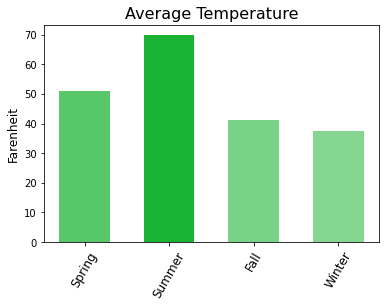

In [7]:
plt.bar(seasons, heights, .6, color=colors)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
plt.xticks(rotation=60, fontsize=12)
plt.show()

In [8]:
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]

In [9]:
def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]

In [10]:
def min_man_temps(year):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
        ) for s in get_seasons(year)]

C:\Users\tomas.ivanaitis\AppData\Local\Temp\ipykernel_22344\1564301558.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


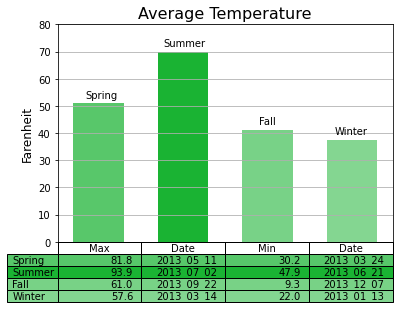

In [25]:
plt.bar(seasons, heights, .6, color=colors)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
rows = ['Spring', 'Summer', 'Fall', 'Winter']
columns = ['Max', 'Date', 'Min', 'Date']
plt.table(cellText=min_man_temps('2013'),
         rowLabels=rows,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors])
plt.xticks([])
[plt.text(i,h+2,s) for i,h,s in zip([-0.15,0.77,1.9,2.8], heights, seasons)]
plt.ylim(0,80)
plt.grid(True)
plt.show()